<a href="https://colab.research.google.com/github/rosalesparramiguel/ML_ActuarialSciences/blob/main/Naive_Bayes_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Clasificador y generador de digitos utilizando Naive Bayes

## Introducción

El propósito de este Notebook es aplicar herramientas estadísticas de clasificación. Dado que el problema de clasificaci ́on es uno de los primeros que aparece a la hora de abordar un problema o situación. Existen dos tipos de clasificación, cuando los grupos están bien definidos y tratamos de determinar criterios para poder etiquetar cada sujeto perteneciente a alguno de estos grupos o cuando no tenemos ninguna información previa y deseamos delimitar los datos en sus diferentes clases. Para este estudio se selecciono una base de datos de unos de imagenes 28x28, las cuales contienen los números escritos del 0 al 9 a mano y se desea clasificar cada una de esas imagenes en su clasificación correspondiente.

En muchas practicas de investigación la ejecución de un método o tratamiento adecuado, comienza desde la elaboración del diagnostico del sujeto que necesita una recolección de datos. Se tomo como ejemplo una base de datos del tipo de imagenes de números escritos a mano. La muestra estuvo conformada por un total 70000 imangenes (este conjuntos de datos contiene una serie de cantidades no especificadas para cada una de las 10 categorias que lo conforman), un muestreo de este tipo permite un buen acercamiento general a la hora de idenficiación de patrones en caligrafia de individuos de un lugar determinado y por ende la identificación del individuo. El diagnostico del comportamiento humano y de igual forma su identifiación es primordial a la hora de una sociedad optima. Las ayudas diagn+osticas se convierten en importantes herramientas para el investigador, sin embargo, la existencia de distintas variables y métodos de análisis que se aplican, ademas del destaque subjetivo del investigador, quien bajo sus propios criterios define qué metodologías va a utilizar, cuántas variables va utilizar y en qué herramientas se apoyará, hacen que estas ayudas sean susceptibles de errores y ambiguedades.

Con la finalidad de corregir o enfrentar los problemas que se han nombrado, se propone realizar en primera instancia una metodologia,el análisis bayesiano como metodología estadística ha sido desarrollado y aplicado en diversas  ́areas del conocimiento con el fin de identificar, clasificar y agrupar variables que explican un determinado fenómeno. Con esto se enmarca el objetivo del notebook, aplicar una herramienta en la clasificación de la relación de diferentes patrones de ciertas caligrafias utilizando las variables del análisis obtenidas de una muestra de imagenes seleccionadas.

### Naive bayes

Naive Bayes es una de las metodología de clasificación a las cuales uno debe acercase, por eso traemos este modelo para realizar una intreoducción al funcionamiento, rendimiento y de igual forma una aplicación de este. Empezamos observar que el nombre de esta metodología nos indica que trabajaremos con teoremá de bayes, pero la segunda parte de este nos indica 'Naive' o sea 'Ingenuo'. El algoritmo tomo ese nombre dado el supuesto que lo identicia, el cual nos dice que la presencia de alguna caracteristica en una clase es totalmente independiente (no guarda relación) con alguna otra caracteristica de la misma clase.


Empezaremos esta introducción al modelo Naive bayes con la mátematica que se puede encontrar debajo de esta metodología, esto se hace para que el lector logre entender en mayor medida el funcionamiento de esta metodología y con esto una mejor aplicación.

**Probabilidad Condicional**

Empezaremos con este tema dado que es uno de los fundamentales que sostiene la escencia del modelo. Empezaremos en como utilizando el teorema de bayes visto en materías o temás de estadistica para lograr llegar a esta probabilidad condicional. La probabilidad condicional es como ajustar nuestras expectativas sobre un evento (objetivo) cuando tenemos información (datos) adicional que puede influir en la probabilidad de que ocurra.

Supondremos que tenemos dos compañeros que son indistinguibles observados de espaldas dada su estatura, contextura, cabello, entre otras. El compañero A que por cuestiones personales solo logra asistir 3 de los 5 días de la semana a clase, mientras que el compañero B por cuestiones de pereza, asiste unicamente 2 de los 5 días de clase. Para este caso considerariamos la información adicional dado que es algo que ya conocemos de antemano.
Si un día x entramos al salon de clase y nos ubicamos en la parte trasera del aula y observamos que en la parte cercana al profesor hay alguien que conocemos pero no logramos indentificar como A o B. Dado que contamos con la información del comportamiento de nuestros compañeros podemos decir que con una probabilidad de $P[Compañero A] = 3/5$, es el compañero A. Y con una proabilidad de  $P[Compañero B] = 2/5$ de que sea el compañero B.

Observando más detalladamente nos percatamos que el compañero trae zapatos, de donde también sabemos lo siguiente.

- Compañero A utiliza zapatos dos días a la semana dadas las normativas de su empresa
- Compañero B utilzia zapatos dos días a la semana dado que asiste al coro de la iglesia de su barrio

Teniendo en consideración esta información historica, tenemos:

- $P[Zapatos | Compañero A] = 3/5$
- $P[Zapatos | Compañero B] = 3/5$

Entones dado que conocemos el comportamiento de los compañeros, quien esta sentado enfrente de nosotros?

![Alt text](image.png)



**Supuesto de independencia**

El otro supuesto fuerte con el cuenta el modelo es la independencia. estadísticamente nombramos la idependecia de la siguiente forma:
- $P[A|B] = P[A]$, esto implica que la probabilidad de A no es afectada por la presencia de B

Esto se habla dado que el modelo toma cada una de las categorias de los invididuos a segmentar y toma sus caracteristicas de forma independiente, ninguna de ellas afecta la presencia de las demás caracteristicas.

**Pros y contras del algoritmo Naive Bayes**
- Manera fácil y rápida de predecir segmentos
- El supuesto de indepoendencia se comporta bien con modelos que continen pocos datos de entrenamiento
- Estimaciones de poca confiabilidad, se puede tomar como un primer acercamiento al comportamiento de los datos
- La independecia de las caracteristicas es muy poco probable en situaciones reales
- Las estimaciones se limitan a las datos con los cuales se ha entrenado.

### MNIS

La base de datos MNIST, que significa "Instituto Nacional Modificado de Estándares y Tecnología", es un conjunto de datos popular en los campos de la visión por computadora y el aprendizaje automático. El Instituto Nacional de Estándares y Tecnología lo creó y luego fue modificado para su uso en huellas dactilares portátiles.

En la base de datos MNIST está disponible una colección de imágenes granuladas de los números escritos a mano del 0 al 9. Hay un número en el medio de cada imagen de 28x28 píxeles. Dado que las imágenes están etiquetadas, es posible determinar el número que aparece en cada una.

Hay un total de 60.000 imágenes de entrenamiento y 10.000 imágenes de prueba en la base de datos MNIST, o 6.000 imágenes por dígito. Almacenar manualmente archivos digitales en esta ubicación es una gran idea. En los campos del aprendizaje automático y la visión por computadora, la base de datos MNIST se ha convertido en un estándar que se utiliza para probar y evaluar varios puntos de referencia y algoritmos de aprendizaje automático. En la industria minera también ha servido de base para numerosos proyectos y concursos debido a su simplicidad y accesibilidad.


## Ejercicio de clasificación de digitos utilizando Naive Bayes

### Importación de librerias y datos

Empezaremos con la importación de algunas librerías con las cuales trabajaremos al rededor de este ejemplo. Entre estas contamos con:
- Pandas 2.0.3: Facilitar la manipulación de datos tabulares, proporcionando estructuras de datos y herramientas eficientes.
- Skelean fetch_openml 0.0.post9: Esta librería cuenta con bases de datos lo cual permite acceder y descargar conjuntos de datos directamente desde el repositorio en línea "OpenML", se propone esta librería para no presentar problemas a la hora de la búsqueda de los datos para las personas que pretenderán replicar este ejemplo.
- sklearn.model_selection: Módulo de scikit-learn que proporciona herramientas para dividir conjuntos de datos en subconjuntos de entrenamiento y prueba
- Matplotlib 3.7.2: Ayuda a crear visualizaciones y gráficos de datos de manera efectiva y personalizada.
- Numpy 1.25.1: Ayuda a realizar operaciones matemáticas y numéricas eficientes en arreglos y matrices multidimensionales.
- Warnings: Permite controlar y manejar advertencias durante la ejecución del programa
- Random: Proporciona funciones para generar números aleatorios y realizar operaciones relacionadas con la aleatoriedad
- Decomposition PCA: Realiza análisis de reducción de dimensionalidad en conjuntos de datos.
- Resample: Ayuda ha generar muestras aleatorias
- Naive_bayes GaussianNB: Nos ayuda con la versión del modelo Naive Bayes para variables continuas
- Naive_bayes BernoulliNB: Nos ayuda con la versión del modelo Naive Bayes cuando se cuenta con más de dos categorías dada la generalidad que cuenta el modelo
- Metrics classification_report: Nos ayuda con algunas métricas de interés con el fin de cuantificar el rendimiento un modelo

De no contar con alguna de estas librerías en su ambiente, puede adquirirlas con el comando *pip install 'nombre_libreria'*, este codigo peude ser ejecutado en una celda de su Jupyter Notebook, o desde la consola de su IDE de prederencia.

In [ ]:
import pandas as pd
import numpy as np
from sklearn.datasets import fetch_openml
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.utils import resample
from sklearn.metrics import classification_report
import random
import warnings

### Selección de datos de entrenamiento y datos de testeo

Para este caso donde estamos utilizando la libreria mnist dada su reproducibilidad de los participantes. Este grupo de datos cuenta con 70000 imagenes de digitos escritos a mano y codificadas para poderlas visualizar de manera de matriz, cuenta con una serie de numeros los cuales nos indican el color que trae el pixel (28x28) y una variable que nos indica el número al cual perteneces esa codificación, esto dividia en llaves dado el diccionario importado por la librería openml

In [ ]:
mnist = fetch_openml('mnist_784')

c:\Users\moshe\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\datasets\_openml.py:1022: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


Visualizaremos la llaves del objeto mnis importado, en este veremos por ejemplo datos con las imagenes codigicadas, las categorías en total con las que cuenta, la variable que nos indica cada ejemplo de pixeles que número a mano representa, entre otras cosas

In [ ]:
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

Imprimiremos 'data' la cual cueta con 784 columnas (28x28), cada una de estas columnas nos indica el pixel y que valor toma para cada una de las imagenes codificadas

In [ ]:
mnist.data.head(2)

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


'Target' nos indica la categoria a la cual pertenece cada una de las codificaciones de pixeles.

In [ ]:
mnist.target.head(2)

0    5
1    0
Name: class, dtype: category
Categories (10, object): ['0', '1', '2', '3', ..., '6', '7', '8', '9']

- 'frame' es la consolidación de la 'data' y el 'target'
- 'categories' nos indican las categorías con las cuales cuenta este conjunto de datos, del 0 al 9
- 'DESCR' nos da una descripción de losdatos, como el autor, el link donde se encuentran entre una descripcón de lo que cuenta el conjunto de datos
- 'details', es undicccionario con la información resumida de DESCR

Visualizaremos como se ve un ejemplo de estas imagenes, tengamos presentes que las imagines fueron procesadas o transformadas a escala de grises lo que significa que cada uno de los pixles que contiene la imagen representa una intensidad de luminicidad, con esto dicho al ejemplificar colores algo vistosos indicaria la representación de esta intensidad

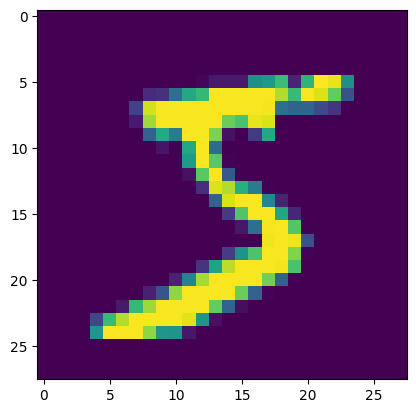

In [ ]:
plt.imshow(np.reshape(mnist.data.loc[0], (28, 28)))

### Entendimiento de datos y limpieza

Comprender los datos es una parte importante del análisis y la comparación de proyectos e implica un estudio y análisis en profundidad de los datos existentes para comprender su naturaleza y calidad. Esto incluye identificar tendencias, patrones y relaciones entre variables, así como identificar y corregir información faltante o incorrecta. El objetivo es observar cuidadosamente los datos en los que se basan las decisiones, crear modelos precisos e identificar posibilidades, garantizando un análisis sólido y resultados confiables.

Dado que la base de datos con la cual estamos trabajando es una data construida, ella tiene una muy buena calidad en los datos. Aún así presentaremos algo de entendimeinto y de ser el caso algo de limpieza.

Presentamos las dimensiones de cada uno de los conntos de entrenamiento y testeo, de igual forma presentamos una observación pero presentandola en escala de grises para observar de manera correcta

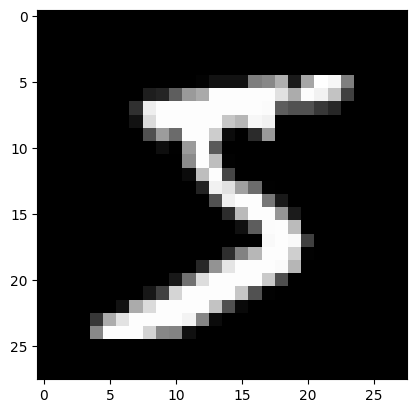

In [ ]:
plt.imshow(np.reshape(mnist.data.loc[0], (28, 28)),cmap='gray')

Dimensiones del conjunto de datos: (70000, 784)


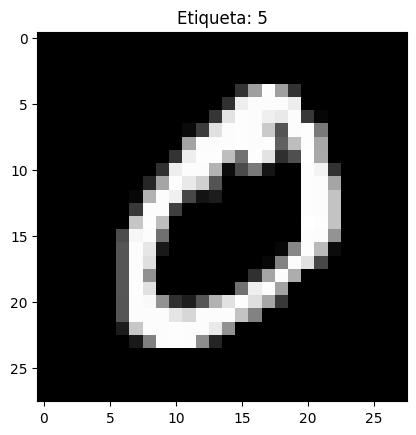

In [ ]:
# Dimensiones de los conjuntos de entrenamiento y prueba
print("Dimensiones del conjunto de datos:", mnist.data.shape)

# Visualizar una imagen de ejemplo
plt.imshow(np.reshape(mnist.data.loc[1], (28, 28)),cmap='gray')
plt.title(f"Etiqueta: {mnist.target.loc[0]}")
plt.show()

Presentaremos un ejemplo de cada imagen pero para cada una de las categorias

In [ ]:
target = mnist.target.to_frame()
data = mnist.data

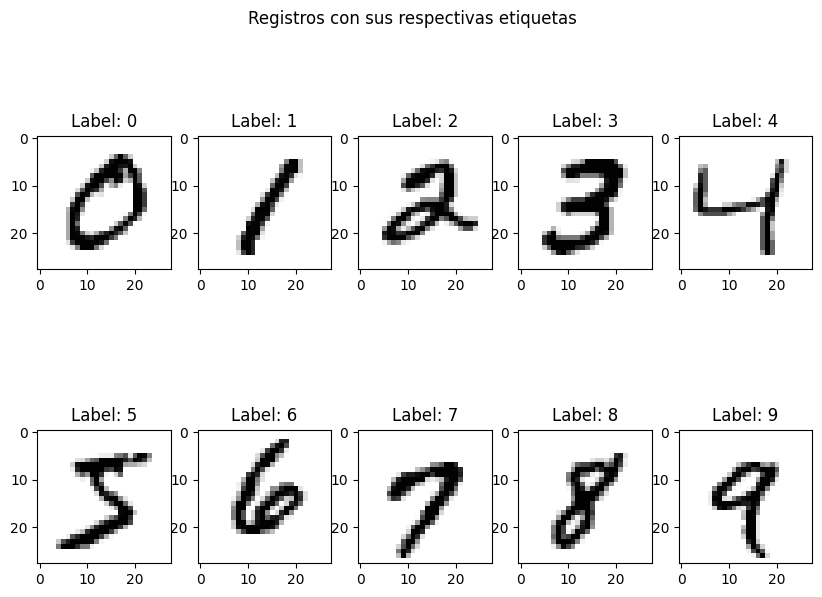

In [ ]:
# crear subplots por número
fig, ax = plt.subplots(2,5, figsize=(10,7))
for i, ax in enumerate(ax.flatten()):
    img_idx: int = target[target['class'] == str(i)].index[0]
    # tomar cada imagen y reescalar 28X28
    img: np.ndarray = np.reshape(data.loc[img_idx], (28, 28))
    ax.imshow(img, cmap="gray_r") #plotear en escala de grises
    ax.set_title(f"Label: {i}") #agregar etiqueta
    ax.grid(False)
fig.suptitle("Registros con sus respectivas etiquetas")
plt.show()

Veremos el número de clases con las cuales cuenta el conjunto de datos, las clases en este caso las consideramos del número 0 al 9. También queremos ver la cantidad de ejemplos que cada una de las clases cuenta, esto es importante dado que necesitamos identificar si hay una clase con una cantidad mayor de ejemplos que las demás clases.
Presentamos la media de pixeles y la desviación de pixeles entre fotografías.

In [ ]:
# Número de clases (dígitos)
num_classes = len(np.unique(target))
print("Número de clases:", num_classes)

# Distribución de clases
unique, counts = np.unique(target, return_counts=True)
class_distribution = dict(zip(unique, counts))
print("Distribución de clases:", class_distribution)

# Estadísticas descriptivas de píxeles
pixel_mean = np.mean(data)
pixel_std = np.std(data)
print("Media de píxeles:", pixel_mean)
print("Promedio desviación estándar de píxeles:", np.mean(pixel_std))

Número de clases: 10
Distribución de clases: {'0': 6903, '1': 7877, '2': 6990, '3': 7141, '4': 6824, '5': 6313, '6': 6876, '7': 7293, '8': 6825, '9': 6958}
Media de píxeles: 33.385964741253645
Promedio desviación estándar de píxeles: 49.255352298398286


**Independencia**:
Uno de los supuestos que tiene el modelo de Naive bayes, el cual es el que se abarcara en este Notebook, es la idependencia entre variables. Con esto visualizaremos las variables que tengan un umbral de correlación inferior a 0,1 o -0.1 puesto que esto  sugiere que las variables son en su mayoría independientes unas de otras

Para no entrar en tecnicismos con pruebas de hipótesis, análisis de regresión, residuos, entre otros. tenemos que si la mayoría de los valores de correlación en la matriz están cerca de cero o son muy pequeños (-0.1 y 0.1), esto sugiere que las variables son en su mayoría independientes unas de otras. Esto puede ser un acercamiento algo poco robusto dado que no garantiza independencia absoluta, pero puede ser un buen acercamiento a este análisis

In [ ]:
# Calcular la matriz de correlación
matriz_correlacion = data.corr()
# Definir el rango de correlación
limite_inferior = -0.1
limite_superior = 0.1
# Contar las correlaciones en el rango definido
correlaciones_en_rango = ((matriz_correlacion >= limite_inferior) & (matriz_correlacion <= limite_superior)).sum().sum()
# Calcular la proporción de correlaciones en el rango
total_correlaciones = matriz_correlacion.size
proporcion_correlaciones_en_rango = correlaciones_en_rango / total_correlaciones
# Imprimir la proporción y evaluar si es baja o alta
print(f"La proporción de correlaciones en el rango ({limite_inferior}, {limite_superior}) es: {proporcion_correlaciones_en_rango}")
if proporcion_correlaciones_en_rango < 0.5:
    print("La proporción es baja, lo que sugiere independencia relativa entre variables.")
else:
    print("La proporción no es baja, lo que sugiere cierta dependencia entre variables.")

La proporción de correlaciones en el rango (-0.1, 0.1) es: 0.7150145772594753
La proporción no es baja, lo que sugiere cierta dependencia entre variables.


También podemos utilizar un método que utilizamos para verificar fácilmente dependencia o multicolinealidad. Este nos dice que si el determinante de una matriz de correlación es igual a cero, esto puede indicar que existe una dependencia lineal significativa entre al menos algunas de las variables en tus datos.
Antes de proceder con con este validación es correcto eliminar las columnas que tienen una varianza igual a cero antes de calcular el determinante de la matriz de correlación. Una variable constante no tiene variabilidad y no contribuye a las relaciones de correlación con otras variables. Por lo tanto, eliminar estas columnas no afectará negativamente la calidad de la matriz de correlación y puede ayudarte a evitar problemas numéricos, como la singularidad (propiedad matemática de una matriz en la que no es posible calcular su inversa).

In [ ]:
# Calcular el determinante de la matriz de correlación
warnings.filterwarnings("ignore")
df_sin_varianza_cero = data.loc[:, data.var() != 0]
matriz_correlacion = df_sin_varianza_cero.corr()
determinante = np.linalg.det(matriz_correlacion.to_numpy())
# Verificar si el determinante es igual a cero (indicación de multicolinealidad)
if abs(determinante) < 0.1:
    print("El determinante es aproximadamente cero, lo que indica multicolinealidad.")
else:
    print("El determinante no es igual a cero, lo que sugiere que no hay multicolinealidad significativa.")

El determinante es aproximadamente cero, lo que indica multicolinealidad.


Componentes principales es una técnica de análisis multivariado que permite reducir la dimensionalidad de los datos y encontrar componentes que son linealmente independientes. Con esto dicho sobre esta metodología podemos proceder con ella para garantizar el supuesto más grande que tiene el Naive bayes

**Balanceo** : Debido a que influye en el rendimiento de los modelos de aprendizaje automático, la validación de la clasificación de datos es crucial en los problemas de clasificación. Estos algoritmos frecuentemente experimentan un desequilibrio grupal, lo que causa sesgos y dificulta la predicción de subgrupos grandes. Además, evita la exageración y garantiza una interpretación precisa y confiable de los resultados, lo cual es crucial para encontrar un modelo que sea estable en circunstancias prácticas y para tomar decisiones precisas y confiables basadas en los datos.

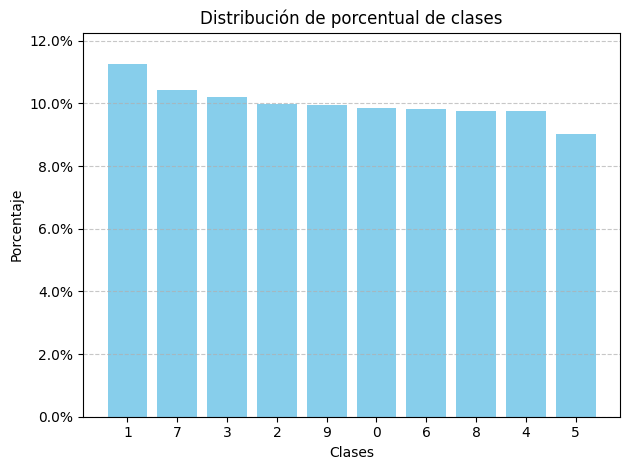

In [ ]:
# Calcular la distribución de clases en porcentajes
distribucion_porcentual = target['class'].value_counts(normalize=True) * 100
# Crear un gráfico de barras con porcentajes
plt.bar(distribucion_porcentual.index, distribucion_porcentual.values, color='skyblue')
plt.xlabel('Clases')
plt.ylabel('Porcentaje')
plt.title('Distribución de porcentual de clases')
# Establecer el límite del eje y de 0 a 100 para representar porcentajes
plt.ylim(0, 100)

# Ajustar el límite superior del eje y para mostrar más allá del 15%
plt.ylim(0, max(distribucion_porcentual.values) + 1)  # Ajustar límite superior

plt.xticks(rotation=0)  # Evitar rotación de etiquetas en el eje x
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Agregar líneas de referencia horizontal
plt.gca().yaxis.set_major_formatter('{:.1f}%'.format)  # Formato de porcentaje en el eje y
plt.tight_layout()  # Ajustar el diseño del gráfico
plt.show()

Para este momento evidenciamos que el desbalanceo visualmente no es relevante, para cuantificar esta hipótesis deberíamos proceder con alguna metodología que nos ayude a decir si esa diferencia es significativa. Dado que en este momento no estamos enfocados en esto, procederemos con un balanceo de datos con la posibilidad de que lectores tengan una herramienta de como proceder dado que esta diferencia si sea significativa.

De igual forma cuantificamos la mayor diferencias que existe en estas categorías:

In [ ]:
# Calcular la distribución de clases en términos de frecuencia
distribucion_frecuencia = target['class'].value_counts()
# Obtener la categoría que tiene más observaciones
categoria_mas_frecuente = distribucion_frecuencia.idxmax()
# Obtener la categoría que tiene menos observaciones
categoria_menos_frecuente = distribucion_frecuencia.idxmin()
# Calcular la diferencia en términos de frecuencia
diferencia_frecuencia = distribucion_frecuencia[categoria_mas_frecuente] - distribucion_frecuencia[categoria_menos_frecuente]
# Calcular la diferencia en términos de porcentaje
total_muestras = len(target)
porcentaje_mas_frecuente = (distribucion_frecuencia[categoria_mas_frecuente] / total_muestras) * 100
porcentaje_menos_frecuente = (distribucion_frecuencia[categoria_menos_frecuente] / total_muestras) * 100
diferencia_porcentaje = porcentaje_mas_frecuente - porcentaje_menos_frecuente

print(f"Categoría más frecuente: {categoria_mas_frecuente}")
print(f"Categoría menos frecuente: {categoria_menos_frecuente}")
print(f"Diferencia en términos de frecuencia: {diferencia_frecuencia}")
print(f"Diferencia en términos de porcentaje: {diferencia_porcentaje:.2f}%")


Categoría más frecuente: 1
Categoría menos frecuente: 5
Diferencia en términos de frecuencia: 1564
Diferencia en términos de porcentaje: 2.23%


Una vez dicho esto, procederemos a un balanceo de datos:

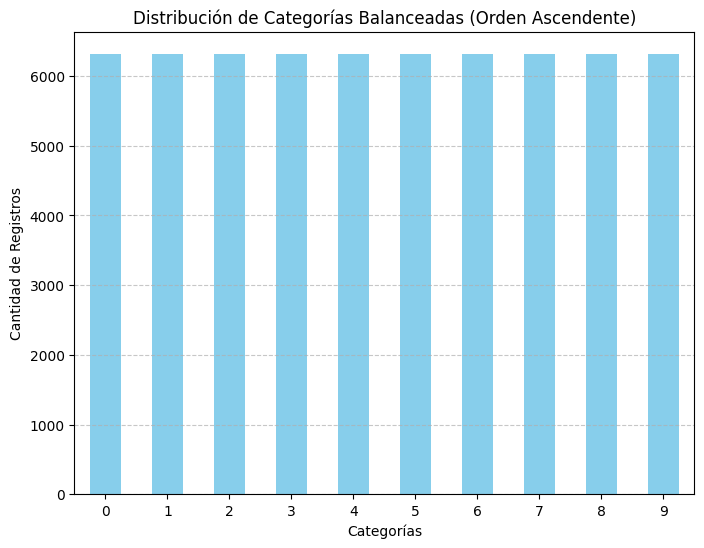

In [ ]:
mnist_consolidado = pd.concat([mnist.data, mnist.target], axis = 1)
# Se selecciona la cantidad mínima entre las clases
min_clase = mnist_consolidado['class'].value_counts().min()
# Crea un DataFrame vacío para almacenar las muestras equilibradas
df_balanceado_final = pd.DataFrame()
# Realiza el muestreo estratificado para cada categoría
for clase in mnist_consolidado['class'].unique():
    clase_df = mnist_consolidado[mnist_consolidado['class'] == clase]
    muestras_equilibradas = resample(clase_df, replace=True, n_samples=min_clase)
    df_balanceado_final = pd.concat([df_balanceado_final, muestras_equilibradas])
df_balanceado_final.rename(columns={'class': 'target'}, inplace=True)
# Verificar la distribución de clases después del balanceo y creación de gráfico
plt.figure(figsize=(8, 6))
df_balanceado_final['target'].value_counts().sort_index().plot(kind='bar', color='skyblue')
plt.xticks(rotation=0)  # Evitar rotación de etiquetas en el eje x
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Agregar líneas de referencia horizontal
plt.xlabel('Categorías')
plt.ylabel('Cantidad de Registros')
plt.title('Distribución de Categorías Balanceadas (Orden Ascendente)')
plt.show()

### Modelación

Como primer paso debemos separar los datos en 2 grupos, los datos de entrenamiento del modelo y los datos de testeo. Para evaluar el rendimiento de un modelo de manera imparcial, dividimos la base de datos en estos dos grupos antes mencionados. Los datos de entrenamiento se utilizan para crear y ajustar el modelo, y los datos de prueba solo se utilizan para evaluar el rendimiento del modelo en datos que no se han visto previamente. Esto ayuda a evaluar la generalización del modelo y evitar el sobreajuste, asegurando que sea aplicable en escenarios del mundo real.

In [ ]:
# Especificar las características (X) y la variable objetivo (y)
X = df_balanceado_final.drop('target', axis=1)
y = df_balanceado_final['target']
# Dividir los datos en entrenamiento (70%) y prueba (30%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
# Verificar el tamaño de los conjuntos de entrenamiento y prueba
print("Tamaño del conjunto de entrenamiento:", len(X_train))
print("Tamaño del conjunto de prueba:", len(X_test))

Tamaño del conjunto de entrenamiento: 44191
Tamaño del conjunto de prueba: 18939


In [ ]:
X_train.reset_index(drop=True, inplace=True)
X_test.reset_index(drop=True, inplace=True)
y_train.reset_index(drop=True, inplace=True)
y_test.reset_index(drop=True, inplace=True)

Dado que en pasos anteriores nos percatamos de una dependencia entre las variables originales, se utiliza Análisis de Componentes Principales para establecer nuevas variables independientes. Esto es significativo porque la presunción principal de Naive Bayes es que los diferentes modelos predictivos son independientes entre sí. El objetivo original de Naive Bayes se puede lograr mejor y la interdependencia entre variables se puede reducir convirtiendo las variables originales en grandes componentes no correlacionados. Esto mejorará el ajuste del modelo y su capacidad para realizar predicciones precisas.

In [ ]:
# Inicializar el objeto PCA con la cantidad de varianza explicada deseada (0.95)
pca = PCA(n_components=0.95)
# Aplicar PCA a los datos de entrenamiento
X_train_pca = pca.fit_transform(X_train)
# Aplicar la misma transformación PCA a los datos de prueba
X_test_pca = pca.transform(X_test)
# Crear nuevos DataFrames con las componentes principales para entrenamiento y prueba
df_train_pca = pd.DataFrame(data=X_train_pca)
df_test_pca = pd.DataFrame(data=X_test_pca)
# Verificar la cantidad de componentes principales seleccionadas
n_componentes = pca.n_components_
print(f"Número de componentes principales seleccionadas: {n_componentes}")

Número de componentes principales seleccionadas: 154


De acuerdo con las características de las variables originales consideradas diferentes y similares, los componentes principales producidos por la metodología multivaraiada de componentes principales representan una reducción en el número de datos originales, haciendo pertinente en esta situación el estudio de los modelos Naive Bayes Gaussianos. Debido a que los componentes producidos por PCA debido a su supuesto son aproximadamente gaussianas, esto debido al teorema del límite central, sabemos que no se cumple con este supuesto estrictamente por lo cual en este caso lo asumiremos verdadero. Además, dado que los componentes principales en esta situación representan una representación continua de los datos, también se ignoran las otras versiones del modelo que están para datos discretos, como polinomios y Bernoulli. Entonces, al hacer predicciones probabilísticas en un entorno con variables continuas, el Gaussian Naive Bayes se convierte en una opción lógica.

In [ ]:
model = GaussianNB()
model.fit(X_train_pca, y_train)

GaussianNB()

In [ ]:
pred_y = model.predict(X_test_pca)
pred_y

array(['2', '3', '9', ..., '9', '9', '6'], dtype='<U1')

### Evaluación del modelo, buscando optimizar parametros

Se pretende evaluar el rendimiento del modelo seleccionado en los supuestos, dado que en este escenario se tiene únicamente un modelo disponible para su evaluación. Por lo tanto, se postula otra versión modelo con el objetivo de analizar su capacidad predictiva y su eficacia en la tarea específica.

Para este caso tomaremos los datos que no cuentan con el procesamiento de componentes principales para contar con las variables discretas y no continuas, esto dado que el método que se presentará es la versión multinomial del naive bayes. Con esto dicho crearemos neuvamente los conjuntos de datos para entrenamiento y testeo pero con la data bruta pero balanceada.

In [ ]:
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X, y, test_size=0.3, random_state=42)

Generamos el modelo:

In [ ]:
model_2 = BernoulliNB()
model_2.fit(X_train_2, y_train_2)

BernoulliNB()

In [ ]:
pred_y_2 = model_2.predict(X_test_2)
pred_y_2

array(['4', '5', '1', ..., '4', '4', '7'], dtype='<U1')

**Evaluación:** Procedemos con la comparación de estos dos modelos, para una evaluación integral de la efectividad de los hablantes, incluida la precisión, el área bajo la curva ROC (AUC-ROC) y la puntuación F1. La precisión mide la proporción de predicciones precisas, AUC-ROC evalúa la capacidad de un modelo para distinguir entre clases, y F1-Score combina equidad y bondad para tener éxito en ambas clases. Menos falso y malicioso. Se seleccionan es estas métricas dado que ofrecen una visión integral del desempeño del modelo en todas las áreas.

In [ ]:
# Generar informes de clasificación para ambos modelos
report_modelo1 = classification_report(y_test, pred_y)
report_modelo2 = classification_report(y_test_2, pred_y_2)

# Imprimir los informes de clasificación para ambos modelos
print("Informe de Clasificación para Gaussian Naive Bayes:")
print(report_modelo1)
print("\nInforme de Clasificación para Multinomial Naive Bayes:")
print(report_modelo2)


Informe de Clasificación para Gaussian Naive Bayes:
              precision    recall  f1-score   support

           0       0.96      0.90      0.93      1955
           1       0.97      0.92      0.94      1901
           2       0.67      0.86      0.75      1898
           3       0.81      0.82      0.82      1886
           4       0.88      0.81      0.84      1910
           5       0.80      0.83      0.82      1847
           6       0.94      0.90      0.92      1914
           7       0.93      0.83      0.88      1909
           8       0.86      0.84      0.85      1855
           9       0.80      0.82      0.81      1864

    accuracy                           0.85     18939
   macro avg       0.86      0.85      0.86     18939
weighted avg       0.86      0.85      0.86     18939


Informe de Clasificación para Multinomial Naive Bayes:
              precision    recall  f1-score   support

           0       0.90      0.90      0.90      1907
           1       0.85 

Se presentaron los reportes de cada uno de los modelos que estamos considerando, si quisiéramos que nos indicara cual es el mejor según alguna métrica procedemos con el siguiente código. Se genera una función donde se indicara respecto a cual variable generaremos la comparacion.

In [ ]:
def comparar_modelos(metrica="accuracy"):
    # generación del reporte en forma de diccionario
    report_modelo1 = pd.DataFrame(classification_report(y_test, pred_y, output_dict=True)).transpose()
    report_modelo2 = pd.DataFrame(classification_report(y_test_2, pred_y_2, output_dict=True)).transpose()
    # Obtener la métrica específica para ambos modelos
    metrica_modelo1 = report_modelo1[metrica]['weighted avg']
    metrica_modelo2 = report_modelo2[metrica]['weighted avg']
    # Comparar los modelos según la métrica
    if metrica_modelo1 > metrica_modelo2:
        return "El modelo 1 es mejor, con: " + str(round(metrica_modelo1*100,2)) +"% y una diferencia es de: " + str(round(metrica_modelo1 - metrica_modelo2,2)*100) + " %"
    elif metrica_modelo2 > metrica_modelo1:
        return "El modelo 2 es mejor, con: " + str(round(metrica_modelo2*100,2)) +"% y una diferencia es de: " + str(round(metrica_modelo2 - metrica_modelo1,1)*100) + " %"
    else:
        return "Ambos modelos tienen el mismo rendimiento."

Dada la creación de la funcióin que nos ayudara al dictamen de que modelo tiene un mejor rendimiento respecto a una métrica en especifica, dejamos las metricas que por las cuales podemos proceder con la comparación:
1. precision
2. recall
3. f1-score


In [ ]:
resultado = comparar_modelos(metrica="f1-score")
print(resultado)

El modelo 1 es mejor, con: 85.68% y una diferencia es de: 3.0 %


### Generación de imagenes nuevas

Puede aumentar el tamaño de su conjunto de datos o generar más muestras para entrenar o probar un modelo de aprendizaje automático mediante la creación de nuevos gráficos utilizando probabilidades determinadas por un ingenuo modelo bayesiano de Bernoulli. Esto puede resultar beneficioso tanto para la comparación de perfiles desequilibrados como para el desarrollo de perfiles compuestos. La utilización de áreas calculadas por el modelo para verificar características en la nueva imagen puede generar contenido similar a la imagen original y al mismo tiempo diferente de ella. Entre sus múltiples usos está el de mejorar el rendimiento de modelos con escasos datos.

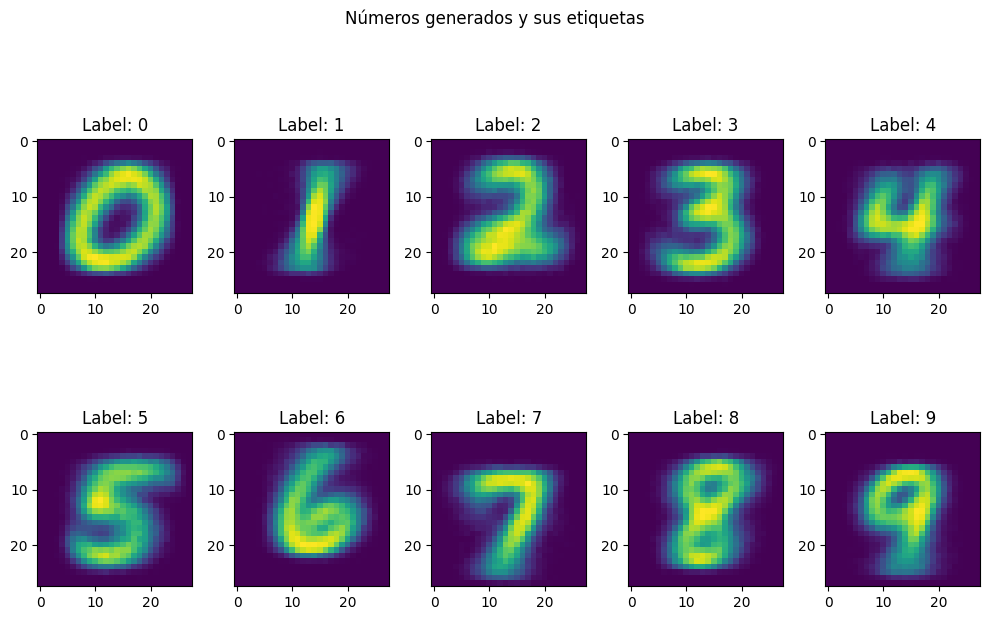

In [ ]:
warnings.filterwarnings("ignore")
fig, ax = plt.subplots(2,5, figsize=(10,7))
# crear subtrama para cada dígito
for i, ax in enumerate(ax.flatten()):
    # obtener una muestra de la distribución de Bernoulli con probabilidades p
    imagen = pd.DataFrame()
    for j in range(1000): # Se genera este bucle para poder generar una mejor imagen con multiples iteraciones
        imagen[j] = np.random.binomial(1,np.exp(model_2.feature_log_prob_[i]), 784)
    vec_generated = imagen.mean(axis=1)
    # reshape el vector a una imagen de 28X28
    img = np.array(vec_generated).reshape((28, 28))
    # plot imagen de dígitos
    ax.imshow(img)
    # agregar label
    ax.set_title(f"Label: {i}")
    ax.grid(False)
fig.suptitle("Números generados y sus etiquetas")
fig.tight_layout()
plt.show()

### Conclusión

En general, el modelo PCA simplificado y el modelo gaussiano Naive Bayes superaron al otro modelo probado en términos de clasificación. A diferencia del Gaussian Naive Bayes, que funciona bien con materiales continuos, el PCA ayuda a reducir la dimensionalidad y a la independencia de las variables, por lo que esto es de esperar. Curiosamente, incluso el modelo multinomial, que no ajusta la independencia de las variables, funciona bien. Esto implica que existen opciones para cada modelo. Sin embargo, para tomar una conclusión, se sugiere compararlos con otros conjuntos de datos. Hay una sección que debe decidirse con respecto a la implenteación del modelo. También se debe planificar el desarrollo futuro del modelo, incluidas las actualizaciones y modificaciones necesarias para mantener la eficacia. Estos dos capitulos se mencionan para que el elctor los tenga en consideración a la hora de la creación de su modelo, en este Notebook no se abarcan dado que no era el objetivo.